In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 580


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="


    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | vilyuchinsk
Processing Record 4 of Set 1 | tazovsky
Processing Record 5 of Set 1 | cadale
Processing Record 6 of Set 1 | cidreira
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | port shepstone
Processing Record 9 of Set 1 | svetlograd
Processing Record 10 of Set 1 | dryden
Processing Record 11 of Set 1 | whangarei
Processing Record 12 of Set 1 | hawaiian paradise park
Processing Record 13 of Set 1 | sitka
Processing Record 14 of Set 1 | ar rass
Processing Record 15 of Set 1 | laojunmiao
Processing Record 16 of Set 1 | chibougamau
Processing Record 17 of Set 1 | kruisfontein
Processing Record 18 of Set 1 | tiksi
Processing Record 19 of Set 1 | blackmans bay
Processing Record 20 of Set 1 | port alfred
Processing Record 21 of Set 1 | bethel
Processing Record 22 of Set 1 | kavien

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,16.14,72,95,10.18,SH,1682546191
1,waitangi,-43.9535,-176.5597,12.68,81,98,5.36,NZ,1682546191
2,vilyuchinsk,52.9306,158.4028,2.15,72,6,2.21,RU,1682546191
3,tazovsky,67.4667,78.7000,-16.72,100,99,1.41,RU,1682546192
4,cadale,2.7603,46.3222,29.15,74,84,5.12,SO,1682546192


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,16.14,72,95,10.18,SH,1682546191
1,waitangi,-43.9535,-176.5597,12.68,81,98,5.36,NZ,1682546191
2,vilyuchinsk,52.9306,158.4028,2.15,72,6,2.21,RU,1682546191
3,tazovsky,67.4667,78.7000,-16.72,100,99,1.41,RU,1682546192
4,cadale,2.7603,46.3222,29.15,74,84,5.12,SO,1682546192


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

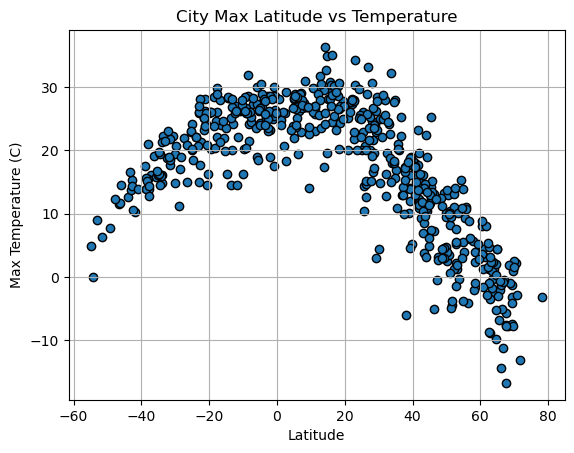

In [8]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df['Lat']
Temp = city_data_df['Max Temp']
plt.scatter(latitude,Temp,edgecolor='black')
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title("City Max Latitude vs Temperature")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

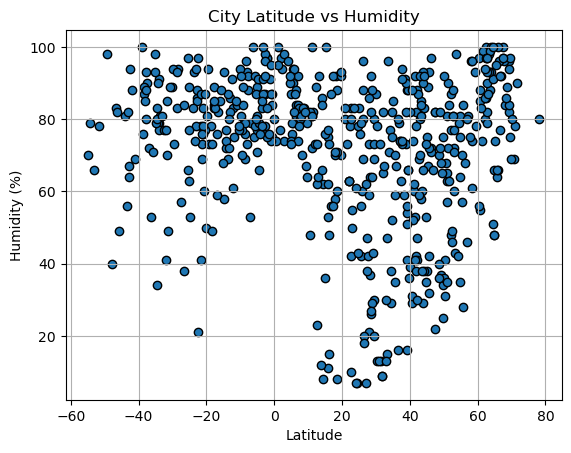

In [9]:
# Build the scatter plots for latitude vs. humidity
latitude = city_data_df['Lat']
humidity = city_data_df['Humidity']
plt.scatter(latitude,humidity,edgecolor='black')
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("City Latitude vs Humidity")
plt.grid(True)



# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

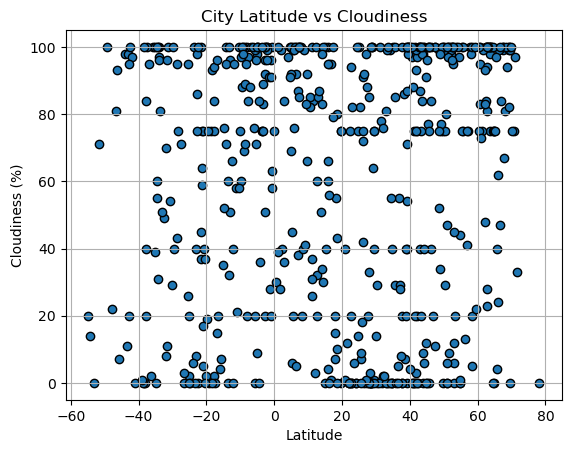

In [10]:
# Build the scatter plots for latitude vs. cloudiness
latitude = city_data_df['Lat']
cloudiness = city_data_df['Cloudiness']
plt.scatter(latitude,cloudiness,edgecolor='black')
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("City Latitude vs Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

plt.show()

#### Latitude vs. Wind Speed Plot

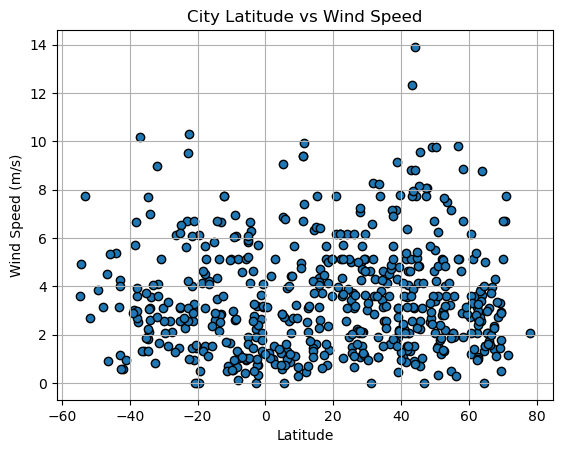

In [11]:
# Build the scatter plots for latitude vs. Wind Speed Plot
latitude = city_data_df['Lat']
cloudiness = city_data_df['Wind Speed']
plt.scatter(latitude,cloudiness,edgecolor='black')
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title("City Latitude vs Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship

In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0,:]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,vilyuchinsk,52.9306,158.4028,2.15,72,6,2.21,RU,1682546191
3,tazovsky,67.4667,78.7000,-16.72,100,99,1.41,RU,1682546192
4,cadale,2.7603,46.3222,29.15,74,84,5.12,SO,1682546192
8,svetlograd,45.3353,42.8547,12.27,67,77,4.84,RU,1682546193
9,dryden,49.7833,-92.7503,10.16,25,75,4.63,CA,1682546193


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0,:]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,16.14,72,95,10.18,SH,1682546191
1,waitangi,-43.9535,-176.5597,12.68,81,98,5.36,NZ,1682546191
5,cidreira,-30.1811,-50.2056,19.46,89,29,3.08,BR,1682546192
6,adamstown,-25.0660,-130.1015,24.19,63,2,2.57,PN,1682546192
7,port shepstone,-30.7414,30.4550,22.21,89,54,5.14,ZA,1682546192


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8718160517365263


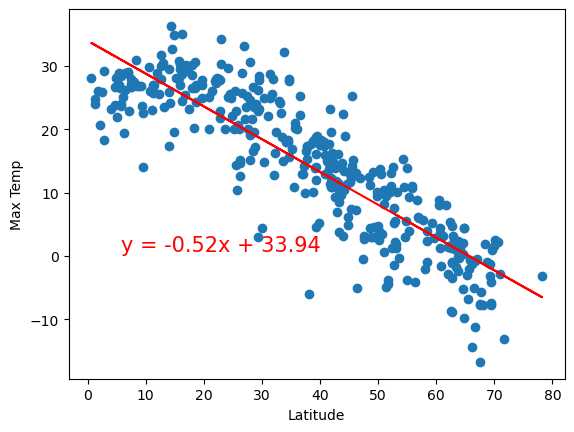

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.7811656573370568


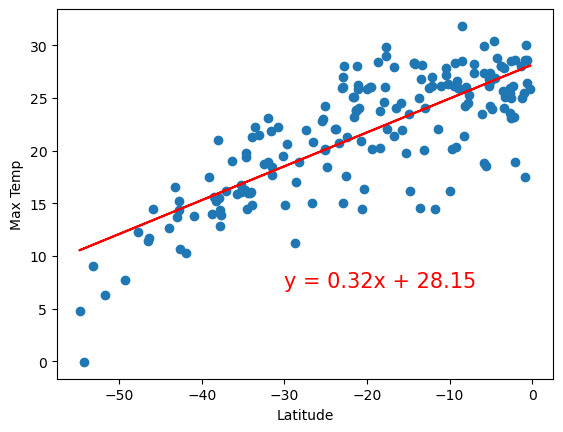

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,7),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")
plt.show()


**Discussion about the linear relationship:** 


For the northern-hemisphere there is a negative correlation between to temperature and the latitude. At zero latitude is the equator, that's where the temperature is at the warmest. Meanwhile the higher the latitude the closer you are to the north pole. So results make show that the further you are from the north pole thereby closer you are to equator, the higher the temperature will be. Hence why there is a negative correlation.   

For the southern-hemisphere the relation is reversed .At the zero latitude is the equator; where temperature is at the highest. Meanwhile at "more negative" the latitude is the close the it to the south pole, where temperature is the coldest. So results make show that the further you are from south pole and thereby closer to the equator, the higher the temperature will be. Hence why there is a positive correlation.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.10589996709326241


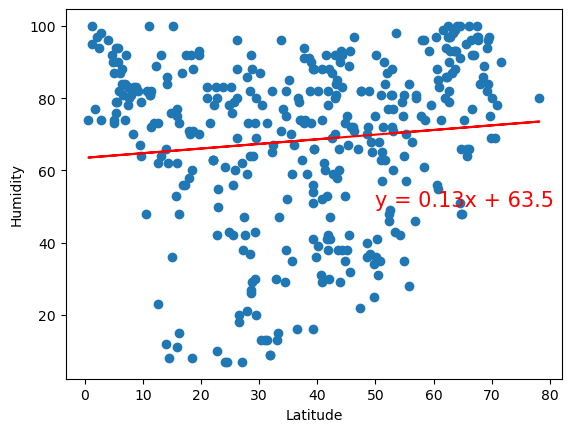

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.18540888459319796


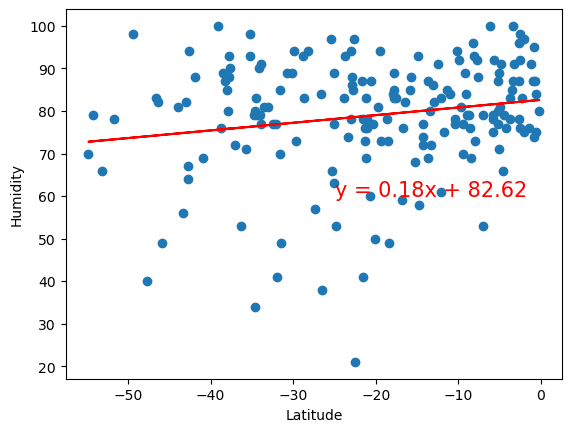

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** 

The southern hemisphere r-value is greater than northern-hemisphere. There is weak positive correlation between latitude and humidity for both northern hemisphere and the southern hemisphere. This yields confusing conclusions. As in the closer you are to the equator for the southern hemisphere, the more humid it will get. While in the northern hemisphere the more futher you are from the equator the humid it gets. However there is still a disparity between the weak correlation. The best explanation for why the northern hemisphere is less humid than the southern-hemisphere is because the Sahara Desert and the Middle East is in the northern hemisphere. Meanwhile the largest desert in the southern hemisphere is in Australia. This may explain the confusing outcomes. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.14276259451579815


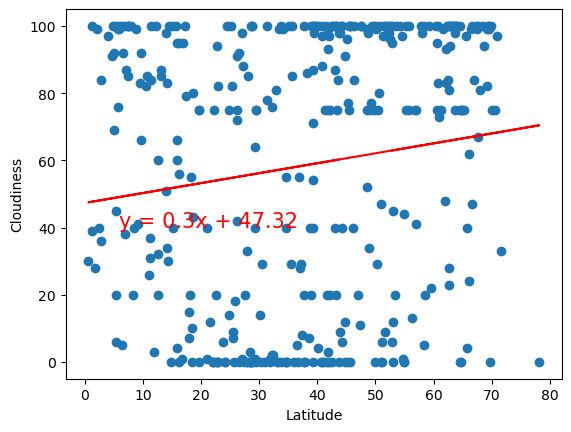

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.22468902130008703


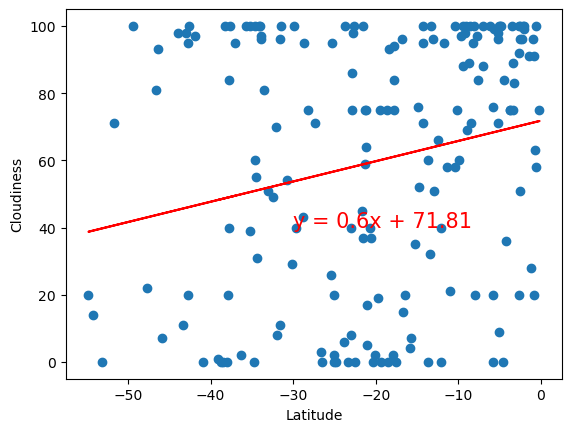

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:**

There is a weak correlation between cloudiness and latitude for both nothern and southern hemisphere. However I do see plenty of clustering for the cloudiness when said cloudiness is at 0 and 100 for both southern and northern hemisphere. The clustering is more pronouced for the nothern hemisphere. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.00819239257033488


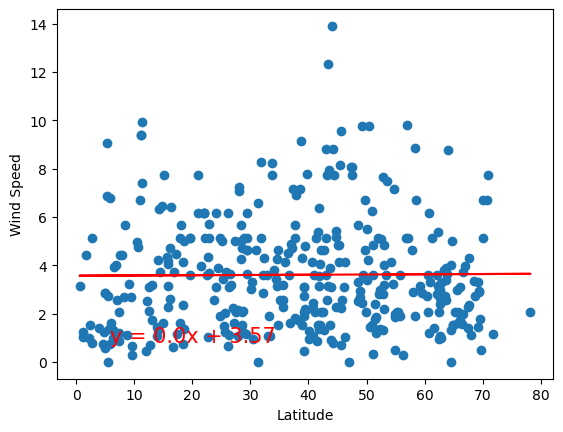

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: -0.13745085311171706


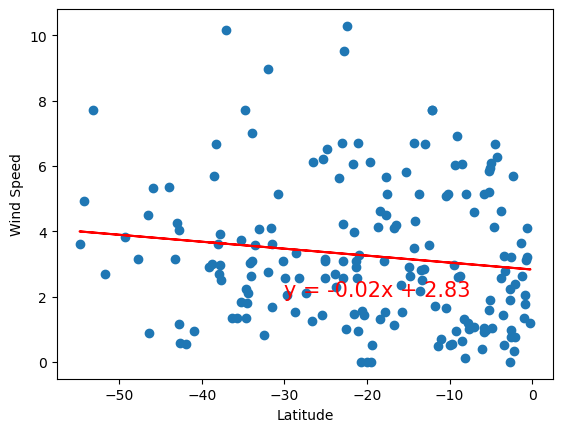

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,2),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** 

There is a weak positive correlation for wind speed and latitude in the northern hemisphere. This implies that the further away you are from the equator thereby closer to the north pole, the higher the wind speed will be. Meanwhile there is a weak negative correlation between the wind speed and the latitude. This implies that the closer you are to the equator tereby further away from the south pole, the higher the wind speed will be. 